In [1]:
### ---- Import Libraries ---- ###

from zlib import crc32
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### ---- Read Data Files and Make a 3rd Data File ---- ###

# Read in training data csv file and check head
w_Train = pd.read_csv("trainingData.csv", sep=",")
w_Validate = pd.read_csv("validationData.csv", sep=",")

In [3]:
f_Train = w_Train.copy() #(19937, 529)
f_Validate = w_Validate.copy() #(1111, 529)

In [4]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = f_Train.loc[w_Train['BUILDINGID'] == 0]
building_1 = f_Train.loc[w_Train['BUILDINGID'] == 1]
building_2 = f_Train.loc[w_Train['BUILDINGID'] == 2]


building_0_val = f_Validate.loc[w_Validate['BUILDINGID'] == 0]
building_1_val = f_Validate.loc[w_Validate['BUILDINGID'] == 1]
building_2_val = f_Validate.loc[w_Validate['BUILDINGID'] == 2]

In [5]:
### ---- Filtering on Floor Number for each building ---- ###

# Now filter by Floor Number - later this will be put in a Get_Floor function

###### TRAINING SET ONLY

## Buiding 0: 
b0_f0 = building_0.loc[building_0['FLOOR'] == 0]
b0_f1 = building_0.loc[building_0['FLOOR'] == 1]
b0_f2 = building_0.loc[building_0['FLOOR'] == 2]
b0_f3 = building_0.loc[building_0['FLOOR'] == 3]

## Buiding 1: 
b1_f0 = building_1.loc[building_1['FLOOR'] == 0]
b1_f1 = building_1.loc[building_1['FLOOR'] == 1]
b1_f2 = building_1.loc[building_1['FLOOR'] == 2]
b1_f3 = building_1.loc[building_1['FLOOR'] == 3]
b1_f4 = building_1.loc[building_1['FLOOR'] == 4]

## Buiding 2: 
b2_f0 = building_2.loc[building_2['FLOOR'] == 0]
b2_f1 = building_2.loc[building_2['FLOOR'] == 1]
b2_f2 = building_2.loc[building_2['FLOOR'] == 2]
b2_f3 = building_2.loc[building_2['FLOOR'] == 3]
b2_f4 = building_2.loc[building_2['FLOOR'] == 4]

###### VALIDATION SET ONLY

## Buiding 0: 
b0_f0_val = building_0_val.loc[building_0_val['FLOOR'] == 0]
b0_f1_val = building_0_val.loc[building_0_val['FLOOR'] == 1]
b0_f2_val = building_0_val.loc[building_0_val['FLOOR'] == 2]
b0_f3_val = building_0_val.loc[building_0_val['FLOOR'] == 3]

## Buiding 1: 
b1_f0_val = building_1_val.loc[building_1_val['FLOOR'] == 0]
b1_f1_val = building_1_val.loc[building_1_val['FLOOR'] == 1]
b1_f2_val = building_1_val.loc[building_1_val['FLOOR'] == 2]
b1_f3_val = building_1_val.loc[building_1_val['FLOOR'] == 3]
b1_f4_val = building_1_val.loc[building_1_val['FLOOR'] == 4]

## Buiding 2: 
b2_f0_val = building_2_val.loc[building_2_val['FLOOR'] == 0]
b2_f1_val = building_2_val.loc[building_2_val['FLOOR'] == 1]
b2_f2_val = building_2_val.loc[building_2_val['FLOOR'] == 2]
b2_f3_val = building_2_val.loc[building_2_val['FLOOR'] == 3]
b2_f4_val = building_2_val.loc[building_2_val['FLOOR'] == 4]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.colors as col

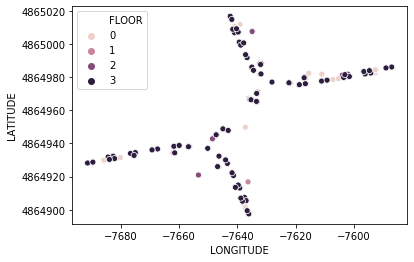

In [7]:
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_0)
plt.rcParams["figure.figsize"] = (20,10)

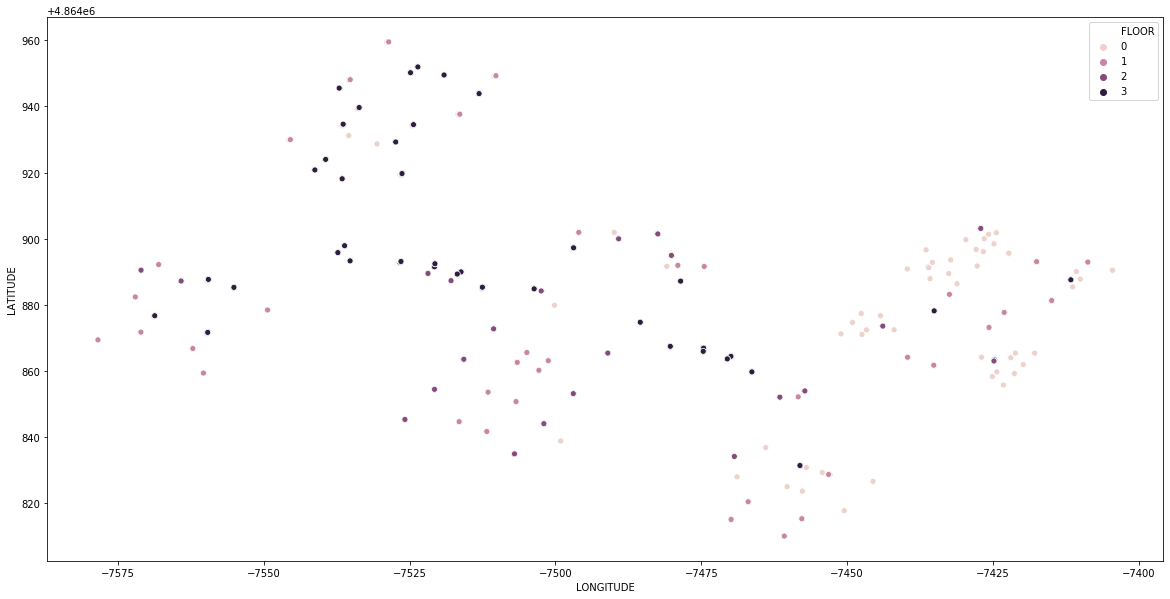

In [8]:
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_1)
plt.rcParams["figure.figsize"] = (20,10)

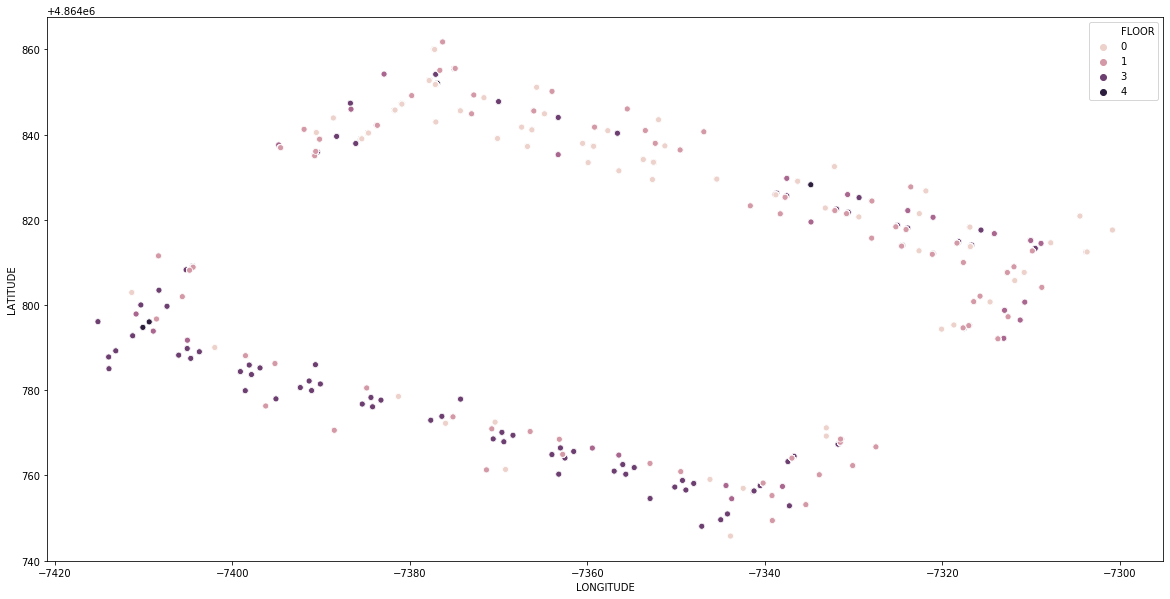

In [9]:
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_2)
plt.rcParams["figure.figsize"] = (20,10)

In [10]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES FOR BUILDING 2 ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X_WAP = building_2.iloc[:, 0:520] # WAP columns
y_FLOOR = building_2.loc[:, "FLOOR"] # Floor Target column
y_val = building_2_val.loc[:, "FLOOR"] # Floor Validation column

In [11]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_WAP, y_FLOOR, test_size = 0.2, random_state = 42)

In [12]:
#### ----  MODEL ITERATION 1: LOGISTIC REGRESSION ---- ###

from sklearn.linear_model import LogisticRegression

## Fitting Log Regression to the Training Set

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_log = confusion_matrix(y_test, y_pred)
acc_log = round(accuracy_score(y_test, y_pred), 4)
prec_log = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_log = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_log = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
## Here are the Error Metrics

print("Confusion Matrix is:", cm_log, sep="\n")
print("********************")
print("Accuracy Score is:", acc_log)
print("********************")
print("Precision Score is:", prec_log)
print("********************")
print("Recall Score is:", recall_log)
print("********************")
print("Recall Score is:", kappa_log)

print("------------------")

Confusion Matrix is:
[[366   7   0   0   0]
 [ 18 376  31   8   0]
 [  5  15 265  27   0]
 [  3   9  19 516  11]
 [  0   0   0  15 208]]
********************
Accuracy Score is: 0.9115
********************
Precision Score is: 0.9117
********************
Recall Score is: 0.9115
********************
Recall Score is: 0.8869
------------------


In [14]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = building_2.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)


Table comparing Prediction Values from Actual Values:


        FLOOR   LONGITUDE      LATITUDE  PREDICTIONS  CHECK
id                                                        
1812       3 -7373.05280  4.864845e+06            3   True
7816       3 -7390.43540  4.864836e+06            3   True
8889       2 -7373.05280  4.864845e+06            2   True
12633      4 -7360.49730  4.864838e+06            4   True
2442       4 -7309.51750  4.864813e+06            4   True
...      ...         ...           ...          ...    ...
4622       1 -7360.49730  4.864838e+06            1   True
18580      0 -7359.91336  4.864833e+06            0   True
15103      1 -7383.67020  4.864842e+06            1   True
2679       3 -7383.26560  4.864778e+06            3   True
13127      2 -7338.85800  4.864826e+06            2   True

[1899 rows x 5 columns]


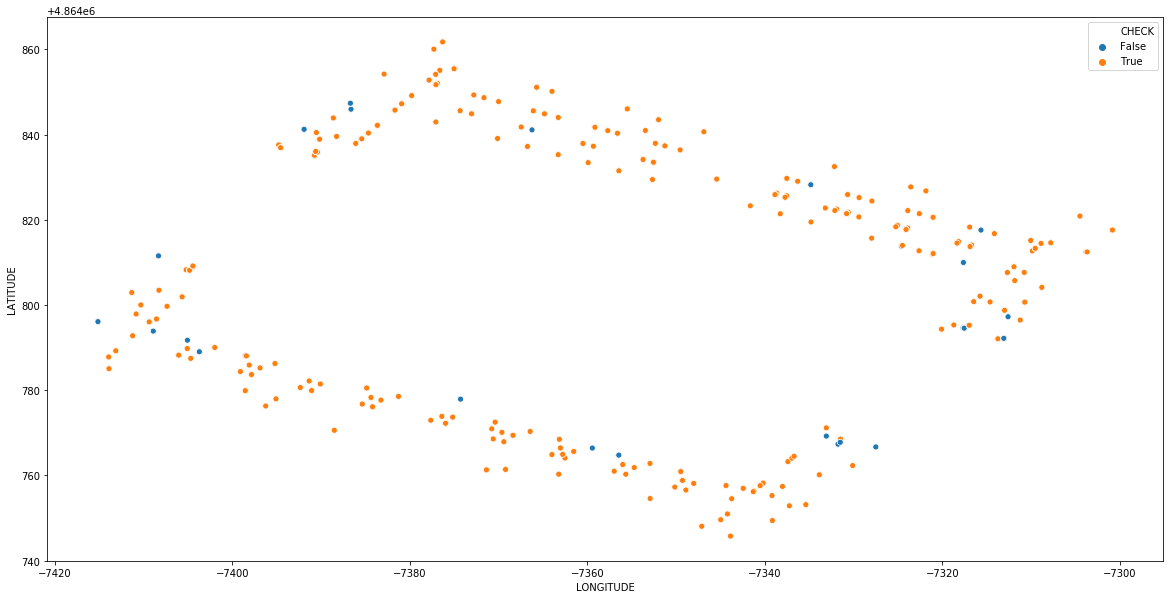

In [15]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)

In [16]:
#### ----  MODEL ITERATION 2: DECISION TREE ---- ###

from sklearn.tree import DecisionTreeClassifier

## Fitting DT Classifier to the training set

clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)
clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = clf.predict(X_test)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_dtc = confusion_matrix(y_test, y_pred)
acc_dtc = round(accuracy_score(y_test, y_pred), 4)
prec_dtc = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_dtc = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_dtc = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [17]:
## Here are the Error Metrics

print("Confusion Matrix is:", cm_dtc, sep="\n")
print("********************")
print("Accuracy Score is:", acc_dtc)
print("********************")
print("Precision Score is:", prec_dtc)
print("********************")
print("Recall Score is:", recall_dtc)
print("********************")
print("Recall Score is:", kappa_dtc)

print("------------------")

Confusion Matrix is:
[[368   5   0   0   0]
 [ 19 399  13   1   1]
 [  3   7 294   8   0]
 [  1   5   6 542   4]
 [  0   0   0   2 221]]
********************
Accuracy Score is: 0.9605
********************
Precision Score is: 0.9607
********************
Recall Score is: 0.9605
********************
Recall Score is: 0.9496
------------------


In [18]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = building_2.copy()

### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR   LONGITUDE      LATITUDE  PREDICTIONS  CHECK
id                                                        
1812       3 -7373.05280  4.864845e+06            3   True
7816       3 -7390.43540  4.864836e+06            3   True
8889       2 -7373.05280  4.864845e+06            2   True
12633      4 -7360.49730  4.864838e+06            4   True
2442       4 -7309.51750  4.864813e+06            4   True
...      ...         ...           ...          ...    ...
4622       1 -7360.49730  4.864838e+06            1   True
18580      0 -7359.91336  4.864833e+06            0   True
15103      1 -7383.67020  4.864842e+06            1   True
2679       3 -7383.26560  4.864778e+06            3   True
13127      2 -7338.85800  4.864826e+06            2   True

[1899 rows x 5 columns]


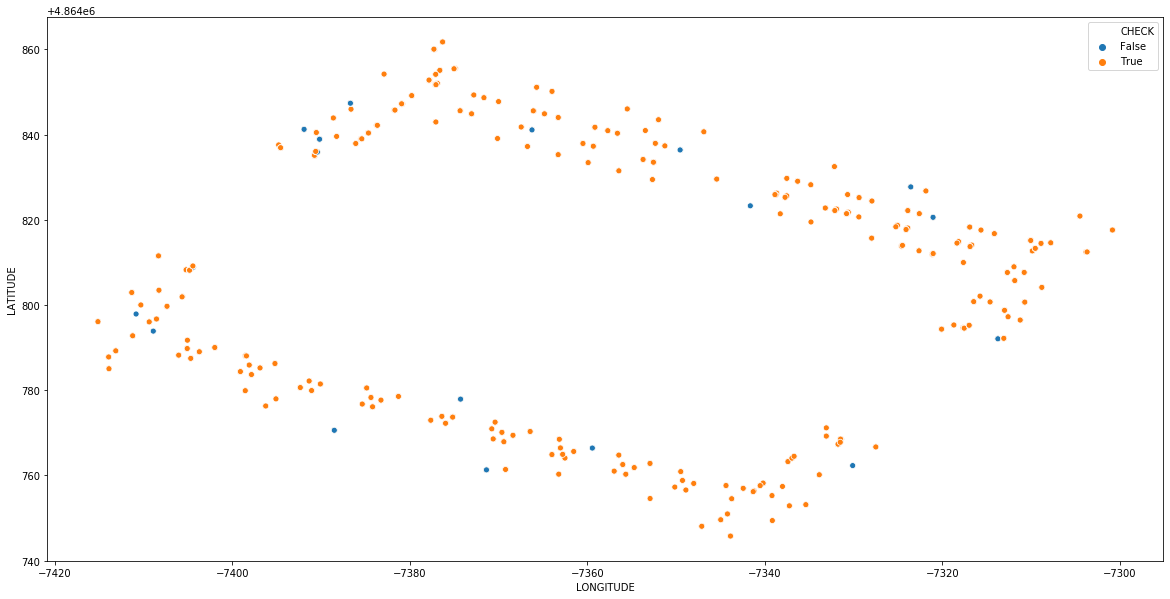

In [19]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)

In [20]:
#### ----  MODEL ITERATION 3: K NEAREST NEIGHBOUR ---- ####

from sklearn.neighbors import KNeighborsClassifier

## Fitting KNN Classifier to the training set

classifier = KNeighborsClassifier (n_neighbors= 5)
classifier.fit(X_train, y_train)

## Predicting the test set results
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

cm_knn = confusion_matrix(y_test, y_pred)

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_knn = confusion_matrix(y_test, y_pred)
acc_knn = round(accuracy_score(y_test, y_pred), 4)
prec_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
kappa_knn = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)



In [21]:
## Here are the Error Metrics

print("Confusion Matrix is:", cm_knn, sep="\n")
print("********************")
print("Accuracy Score is:", acc_knn)
print("********************")
print("Precision Score is:", prec_knn)
print("********************")
print("Recall Score is:", recall_knn)
print("********************")
print("Recall Score is:", kappa_dtc)

print("------------------")

Confusion Matrix is:
[[373   0   0   0   0]
 [ 20 409   4   0   0]
 [  3   6 298   5   0]
 [  1   3   3 549   2]
 [  1   0   0   0 222]]
********************
Accuracy Score is: 0.9747
********************
Precision Score is: 0.9752814939453965
********************
Recall Score is: 0.9747235387045814
********************
Recall Score is: 0.9496
------------------


In [22]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = building_2.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR   LONGITUDE      LATITUDE  PREDICTIONS  CHECK
id                                                        
1812       3 -7373.05280  4.864845e+06            3   True
7816       3 -7390.43540  4.864836e+06            3   True
8889       2 -7373.05280  4.864845e+06            2   True
12633      4 -7360.49730  4.864838e+06            4   True
2442       4 -7309.51750  4.864813e+06            4   True
...      ...         ...           ...          ...    ...
4622       1 -7360.49730  4.864838e+06            1   True
18580      0 -7359.91336  4.864833e+06            0   True
15103      1 -7383.67020  4.864842e+06            1   True
2679       3 -7383.26560  4.864778e+06            3   True
13127      2 -7338.85800  4.864826e+06            2   True

[1899 rows x 5 columns]


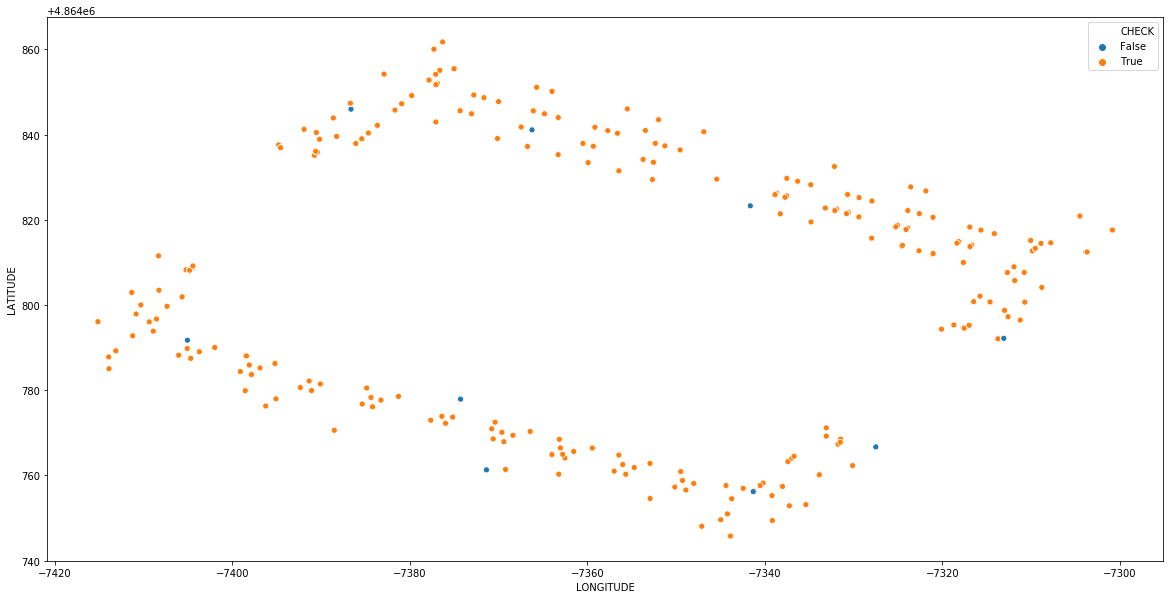

In [23]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)

In [24]:
#### ----  MODEL ITERATION 4: RANDOM FOREST PART 2 RF ---- ####

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Fitting KNN Classifier to the training set

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = rf_clf.predict(X_test)

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [25]:
## Here are the Error Metrics

print("Confusion Matrix is:", cm_rf, sep="\n")
print("********************")
print("Accuracy Score is:", acc_rf)
print("********************")
print("Precision Score is:", prec_rf)
print("********************")
print("Recall Score is:", recall_rf)
print("********************")
print("Recall Score is:", kappa_rf)

print("------------------")

Confusion Matrix is:
[[373   0   0   0   0]
 [  4 429   0   0   0]
 [  1   1 308   2   0]
 [  0   0   0 558   0]
 [  0   0   0   0 223]]
********************
Accuracy Score is: 0.9958
********************
Precision Score is: 0.9958221715003129
********************
Recall Score is: 0.9957872564507636
********************
Recall Score is: 0.9946
------------------


In [26]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = building_2.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR   LONGITUDE      LATITUDE  PREDICTIONS  CHECK
id                                                        
1812       3 -7373.05280  4.864845e+06            3   True
7816       3 -7390.43540  4.864836e+06            3   True
8889       2 -7373.05280  4.864845e+06            2   True
12633      4 -7360.49730  4.864838e+06            4   True
2442       4 -7309.51750  4.864813e+06            4   True
...      ...         ...           ...          ...    ...
4622       1 -7360.49730  4.864838e+06            1   True
18580      0 -7359.91336  4.864833e+06            0   True
15103      1 -7383.67020  4.864842e+06            1   True
2679       3 -7383.26560  4.864778e+06            3   True
13127      2 -7338.85800  4.864826e+06            2   True

[1899 rows x 5 columns]


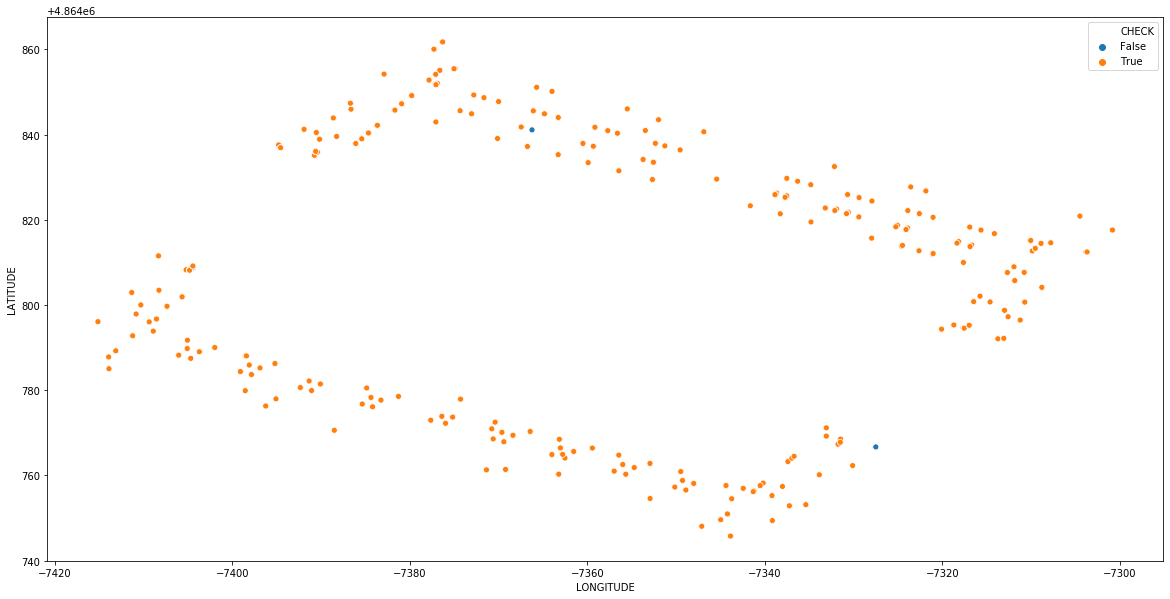

In [27]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)